In [ ]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')




In [ ]:
df= pd.read_csv("C:/Users/offic/OneDrive/Desktop/Internship/Restaurant_Reviews.tsv", delimiter='\t',quoting=3)

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.shape

(1000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df['Liked'].describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Liked, dtype: float64

In [ ]:
df['Liked'].value_counts()


1    500
0    500
Name: Liked, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
Review,1000,996,I would not recommend this place.,2


In [ ]:
df['length']=df['Review'].apply(len)
df.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [ ]:
df[df['length']==100]['Review'].iloc[0]

"Perhaps I caught them on an off night judging by the other reviews, but I'm not inspired to go back."

In [ ]:

import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
corpus = []
for i in range(0,1000):

  #1000 records
  #cleaning special character from the reviews
  #the re.sub() method performs global search and global replace on the given data
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=str(df['Review'][i]))

    #convering the entire review into lowercase
    review = review.lower()

    #Tokenizing the review by words
    review_words = review.split()

    #removing the stop words
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]    #stopwords are the english wordswhich doesn't add much meaning to a sentence

      #streaming the stop words
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]

    #joining the stemmed words
    review = ' '.join(review)

   #creating a corpus
    corpus.append(review)



In [ ]:
corpus[0:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [ ]:
#creating the bags of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)  #max_features = 1500
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:,1].values



In [ ]:
from sklearn.model_selection import train_test_split   #used to test the data into training data and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

#random_state simply sets seed to the random generator, so that your train-test splits are always deterministic. if you dont set seed, it is difficult to each time

#Training (1000,1500)
#1000 * 80/100 = 800
#1000 * 20/100 = 200



In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [ ]:
#Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import MultinomialNB
# the multinomial Naive Bayes classifier is suitable for classification with discrete features(e.g., word counts for text classification).

classifier = MultinomialNB()
classifier.fit(X_train,y_train)  #fit training data


MultinomialNB()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_test


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [ ]:
#Accuracy,Prediction and Recall

from sklearn.metrics import accuracy_score
#in python, the accuracy_score function of the sklearn. metrics package calculates the accuracy the accuracy score for a set of predicted labels against the true labels.

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("-------scores--------")
print("Accuracy score is : {}%".format(round(score1*100,2)))
print("precision_score is : {}%".format(round(score2*100,2)))
print("recall_score is : {}%".format(round(score3*100,2)))

-------scores--------
Accuracy score is : 76.5%
precision_score is : 76.42%
recall_score is : 78.64%


In [ ]:
#making the confusion matrix
#A confusion matrix is table that is used to define the performance of a classification algorithm.
#A confusion matrix visualizes and summarizes the performance of a classification

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)



In [ ]:
cm

array([[72, 25],
       [22, 81]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual values')

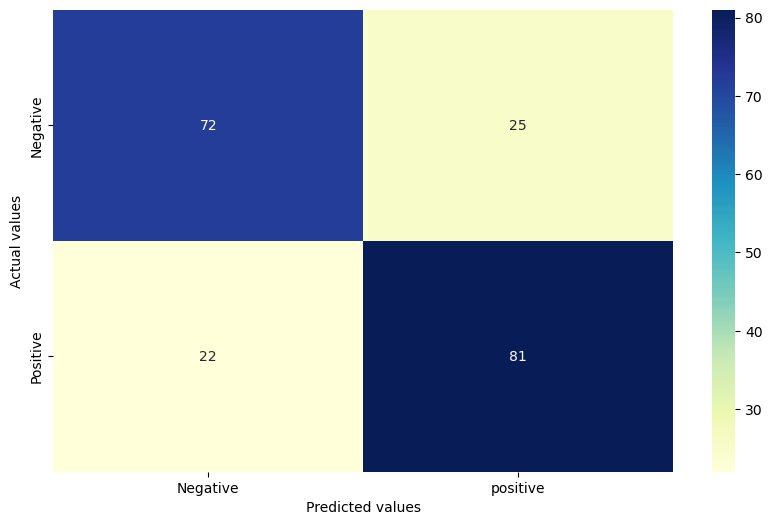

In [ ]:
#plotting the confusion matrix

import matplotlib.pyplot as plt   #matplotlib is a low level graph plotting library in python that servs as a visualization utility
import seaborn as sns    #seaborn is python data visualization library based on matplotlib
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=["Negative","positive"],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [ ]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy score for alpha = {} is : {}%".format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print("-------------------------------------------")
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100,2),round(alpha_val,1)))


Accuracy score for alpha = 0.1 is : 78.0%
Accuracy score for alpha = 0.2 is : 78.5%
Accuracy score for alpha = 0.3 is : 78.0%
Accuracy score for alpha = 0.4 is : 78.0%
Accuracy score for alpha = 0.5 is : 77.5%
Accuracy score for alpha = 0.6 is : 77.5%
Accuracy score for alpha = 0.7 is : 77.5%
Accuracy score for alpha = 0.8 is : 77.0%
Accuracy score for alpha = 0.9 is : 76.5%
Accuracy score for alpha = 1.0 is : 76.5%
-------------------------------------------
The best accuracy is 78.5% with alpha value as 0.2


In [ ]:
classifier = MultinomialNB(alpha = 0.2)
classifier.fit(X_train,y_train)


MultinomialNB(alpha=0.2)

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern = '[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review =sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)


In [ ]:
#Predicted values
sample_review = 'The food is very very good'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')


This is a POSITIVE review


In [ ]:
#Predicted values
sample_review = 'The food pretty bad and the service was very slow'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')

This is Negative review!


In [ ]:
#Predicted values
sample_review = 'The food was absolutely wonderful, from preparation to presentation,very pleasing.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')

This is a POSITIVE review
